<a href="https://colab.research.google.com/github/QuanRy/ML_MiFi/blob/main/lab_1/ML_1_6_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузим данные

In [4]:
import pandas as pd

df = pd.read_csv("data_v1-06.csv")

print(df.head(10))

         x       y
0  0.01000  1.0145
1  0.03519  1.0203
2  0.06038  1.1508
3  0.08557  1.1833
4  0.11076  1.1797
5  0.13595  1.0025
6  0.16114  1.4880
7  0.18633  1.1090
8  0.21152  1.2097
9  0.23671  1.6791


In [5]:
# Установим необходимые библиотеки
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Задача 1**



In [6]:
# Разделение данных на входной и целевой параметры
X = df['x']
y = df['y']

# Добавляем константный столбец для модели OLS
X = sm.add_constant(X)


In [7]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построение модели линейной регрессии на обучающей выборке
model = sm.OLS(y_train, X_train).fit()

In [8]:
# Предсказание на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вывод коэффициентов детерминации
r2_train = model.rsquared
r2_test = 1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print("Коэффициент детерминации на обучающей выборке:", r2_train)
print("Коэффициент детерминации на тестовой выборке:", r2_test)

Коэффициент детерминации на обучающей выборке: 0.712999257261091
Коэффициент детерминации на тестовой выборке: 0.6732369282438528


In [18]:
# Получение доверительных интервалов
confidence_90 = model.get_prediction(X).conf_int(alpha=0.1)  # 90%
confidence_99 = model.get_prediction(X).conf_int(alpha=0.01)  # 99%

print("\nДоверительные интервалы 90%:")
print(confidence_90[:5])

print("\nДоверительные интервалы 99%:")
print(confidence_99[:5])


Доверительные интервалы 90%:
[[-0.66176026  0.59331634]
 [-0.55743847  0.67438928]
 [-0.45318994  0.75553549]
 [-0.34901894  0.83675923]
 [-0.24493008  0.9180651 ]]

Доверительные интервалы 99%:
[[-1.03538882  0.96694489]
 [-0.92414599  1.0410968 ]
 [-0.81302004  1.11536558]
 [-0.70201779  1.18975807]
 [-0.59114657  1.26428159]]


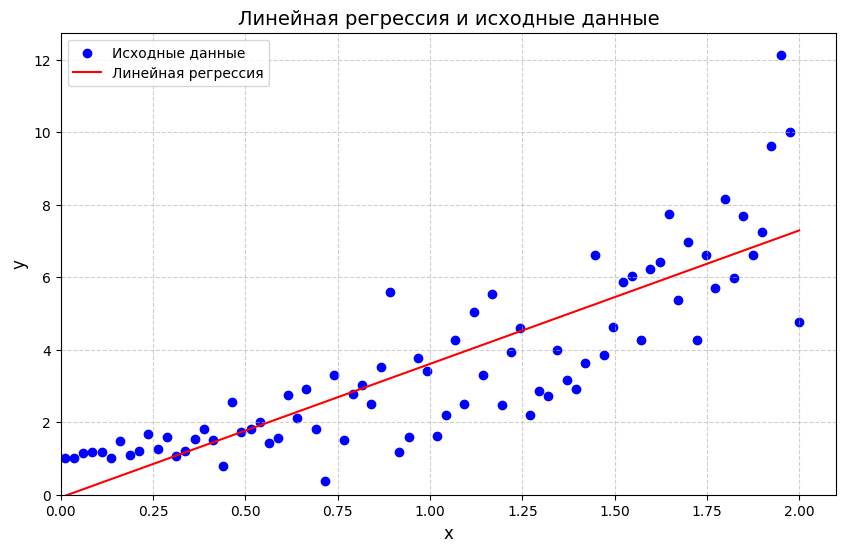

In [23]:
# Визуализация регрессии, исходных данных и доверительных интервалов
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния для исходных данных
plt.scatter(df['x'], df['y'], label="Исходные данные", color="blue")

# Линия регрессии
plt.plot(df['x'], model.predict(X), label="Линейная регрессия", color="red")

# Подписи осей
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)

# Легенда, вынесенная в левый верхний угол
plt.legend(loc="upper left", fontsize=10)

# Установка начала координат с нуля
plt.xlim(left=0)
plt.ylim(bottom=0)

# Заголовок графика
plt.title("Линейная регрессия и исходные данные", fontsize=14)

# Сетка
plt.grid(True, linestyle='--', alpha=0.6)

# Отображение графика
plt.show()


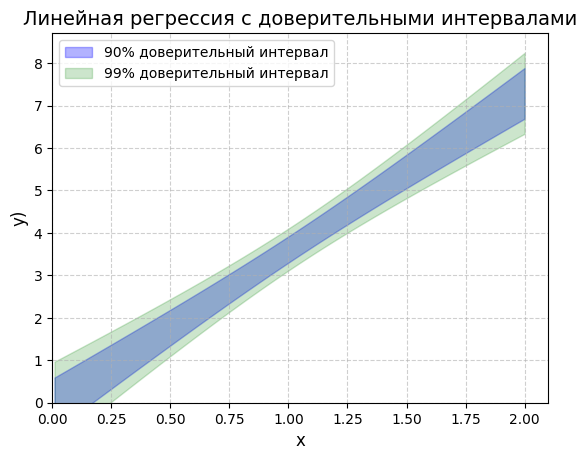

In [27]:
# Построение доверительных интервалов
plt.fill_between(df['x'], confidence_90[:, 0], confidence_90[:, 1], color="blue", alpha=0.3, label="90% доверительный интервал")
plt.fill_between(df['x'], confidence_99[:, 0], confidence_99[:, 1], color="green", alpha=0.2, label="99% доверительный интервал")

# Настройка осей
plt.xlabel("x", fontsize=12)
plt.ylabel("y)", fontsize=12)

# Подпись графика
plt.title("Линейная регрессия с доверительными интервалами", fontsize=14)

# Настройка координатной системы (начало с нуля)
plt.xlim(left=0)
plt.ylim(bottom=0)

# Легенда, вынесенная в левый верхний угол
plt.legend(loc="upper left", fontsize=10)

# Сетка
plt.grid(True, linestyle='--', alpha=0.6)

# Показ графика
plt.show()

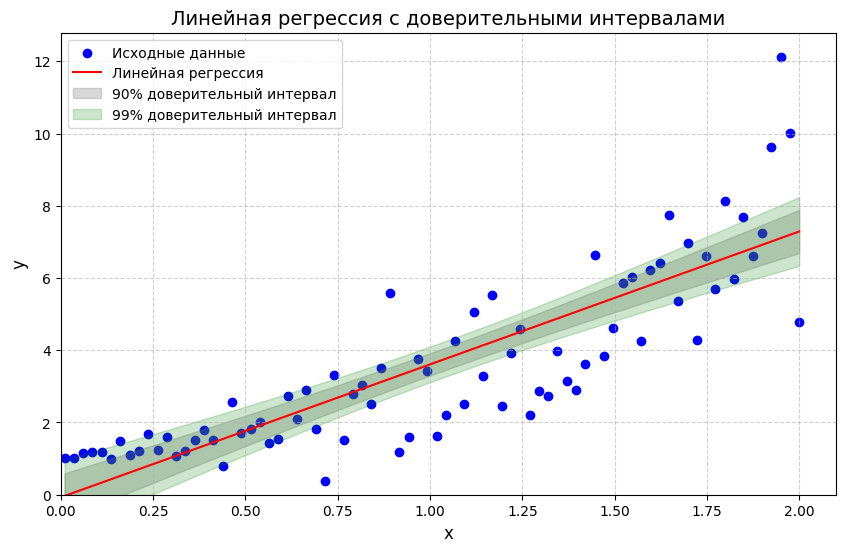

In [33]:
# Визуализация регрессии, исходных данных и доверительных интервалов
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния для исходных данных
plt.scatter(df['x'], df['y'], label="Исходные данные", color="blue")

# Линия регрессии
plt.plot(df['x'], model.predict(X), label="Линейная регрессия", color="red")

# Добавление границ доверительных интервалов
plt.fill_between(df['x'], confidence_90[:, 0], confidence_90[:, 1], color="gray", alpha=0.3, label="90% доверительный интервал")
plt.fill_between(df['x'], confidence_99[:, 0], confidence_99[:, 1], color="green", alpha=0.2, label="99% доверительный интервал")

# Подписи осей
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)

# Легенда, вынесенная в левый верхний угол
plt.legend(loc="upper left", fontsize=10)

# Установка начала координат с нуля
plt.xlim(left=0)
plt.ylim(bottom=0)

# Заголовок графика
plt.title("Линейная регрессия с доверительными интервалами", fontsize=14)

# Сетка
plt.grid(True, linestyle='--', alpha=0.6)

# Отображение графика
plt.show()


# **Задача 2**

In [43]:
# Вычисление остатков
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

print("\n Остатки при обучении:")
print(residuals_train[:5])

print("\n Остатки при тестировании 99%:")
print(residuals_test[:5])


 Остатки при обучении:
34    0.393011
62   -1.448389
42    0.405459
54   -1.808983
16    0.071564
dtype: float64

 Остатки при тестировании 99%:
30   -1.234299
0     1.048722
22   -0.572920
31   -0.062296
18    0.927469
dtype: float64


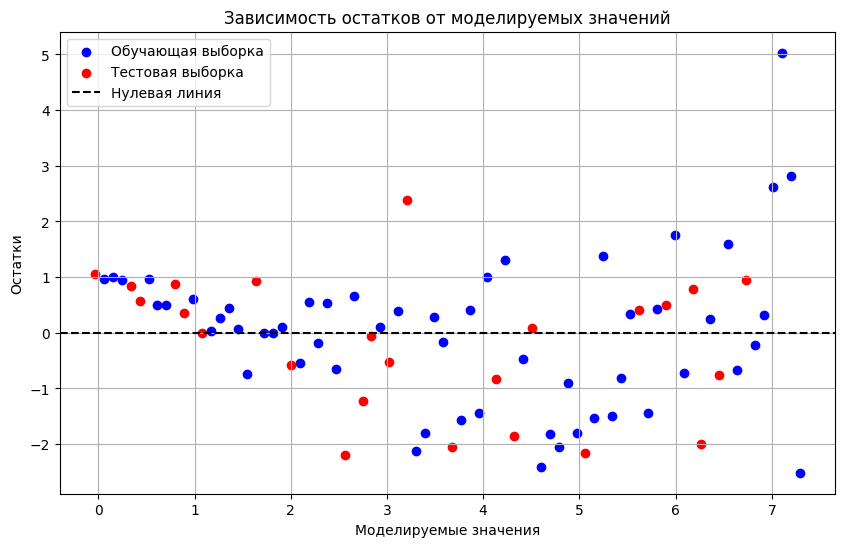

In [44]:
# График остатков от предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, color='blue', label='Обучающая выборка')
plt.scatter(y_test_pred, residuals_test, color='red', label='Тестовая выборка')
plt.axhline(0, color='black', linestyle='--', label='Нулевая линия')
plt.xlabel("Моделируемые значения")
plt.ylabel("Остатки")
plt.title("Зависимость остатков от моделируемых значений")
plt.legend()
plt.grid(True)
plt.show()

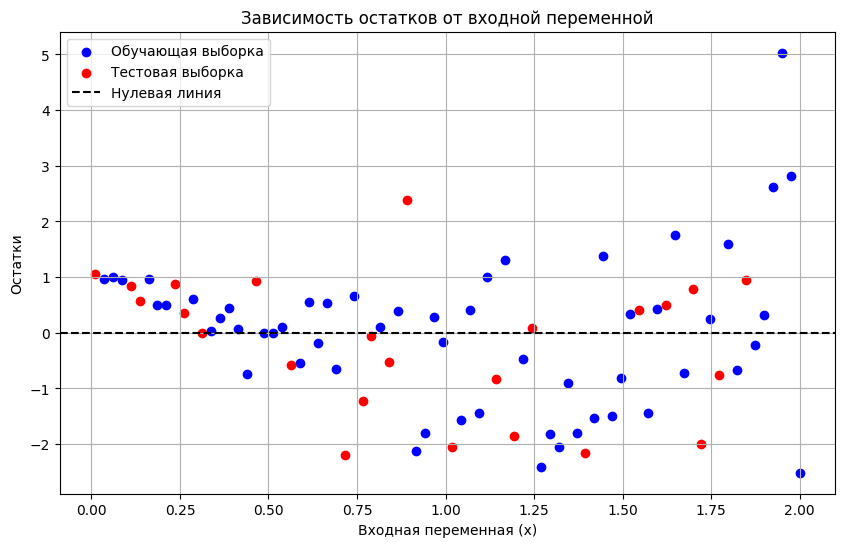

In [45]:
# График остатков от входной переменной
plt.figure(figsize=(10, 6))
plt.scatter(X_train['x'], residuals_train, color='blue', label='Обучающая выборка')
plt.scatter(X_test['x'], residuals_test, color='red', label='Тестовая выборка')
plt.axhline(0, color='black', linestyle='--', label='Нулевая линия')
plt.xlabel("Входная переменная (x)")
plt.ylabel("Остатки")
plt.title("Зависимость остатков от входной переменной")
plt.legend()
plt.grid(True)
plt.show()

Качественный анализ на гетероскедастичность остатков

<ipython-input-46-2158f1b5b875>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_variance = residuals_train.groupby(grouped).var()


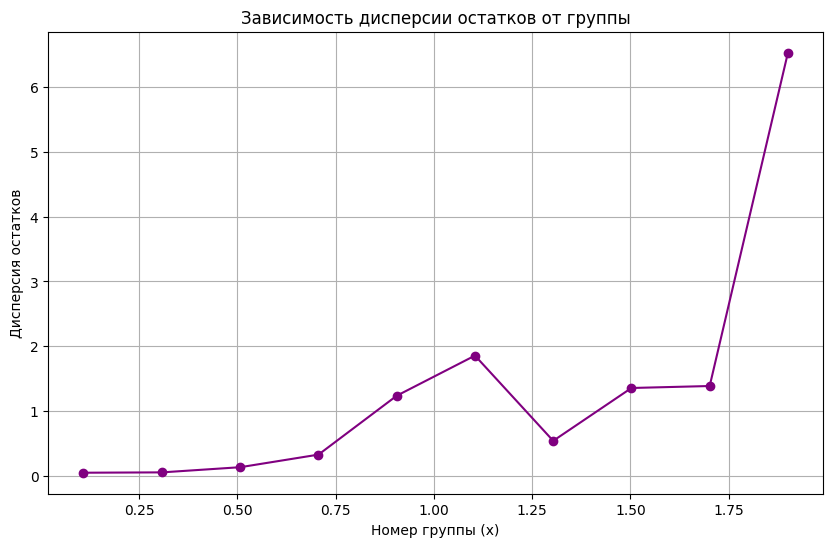

In [46]:
# Группировка по значениям x и расчет дисперсии остатков в каждой группе
num_groups = 10
grouped = pd.cut(df['x'], bins=num_groups)
group_variance = residuals_train.groupby(grouped).var()

# Построение графика дисперсии остатков по группам
plt.figure(figsize=(10, 6))
plt.plot(group_variance.index.categories.mid, group_variance, marker='o', linestyle='-', color='purple')
plt.xlabel("Номер группы (x)")
plt.ylabel("Дисперсия остатков")
plt.title("Зависимость дисперсии остатков от группы")
plt.grid(True)
plt.show()